**Dataset Shape Overview**

This bar chart provides a simple overview of the dataset's structure by showing the total number of rows and columns.
We started with 80.199rows and 37 columns.
After cleaning we are left with 44.174 rows and 14 columns and we added price/m² for a total of 15 columns.


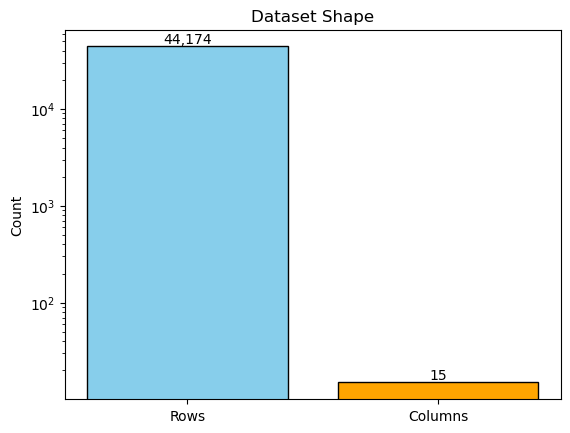

In [178]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.display import display, Markdown

pio.renderers.default = 'notebook'

# Load the cleaned data
df = pd.read_csv(r"C:\Users\difke\becode\challenge-data-analysis\Data\Cleaned_data.csv")
"""Visualisation of number of columns and rows"""
# Print statement explaining the chart
display(Markdown("**Dataset Shape Overview**"))
print("This bar chart provides a simple overview of the dataset's structure by showing the total number of rows and columns.")
print("We started with 80.199rows and 37 columns.")
print("After cleaning we are left with 44.174 rows and 14 columns and we added price/m² for a total of 15 columns.")

# Get dimensions
num_rows, num_columns = df.shape
shape = pd.DataFrame({'Dimension': ['Rows', 'Columns'],
                      'Count': [num_rows, num_columns]})

# Plot
plt.figure()
plt.bar(['Rows', 'Columns'], [num_rows, num_columns],
        color=['skyblue', 'orange'], edgecolor='black', log=True)

for i, count in enumerate([num_rows, num_columns]):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.title('Dataset Shape')
plt.ylabel('Count')
plt.show()

**Distribution of All Properties by Surface Area**

This histogram shows the distribution of all properties based on their habitable surface in m².
It helps identify whether there are common property sizes, and shows any skewness in the data (e.g. many small apartments vs few large houses).
As you can see: This chart includes some extreme values which skew the visual impression and make the chart alomst unusable.


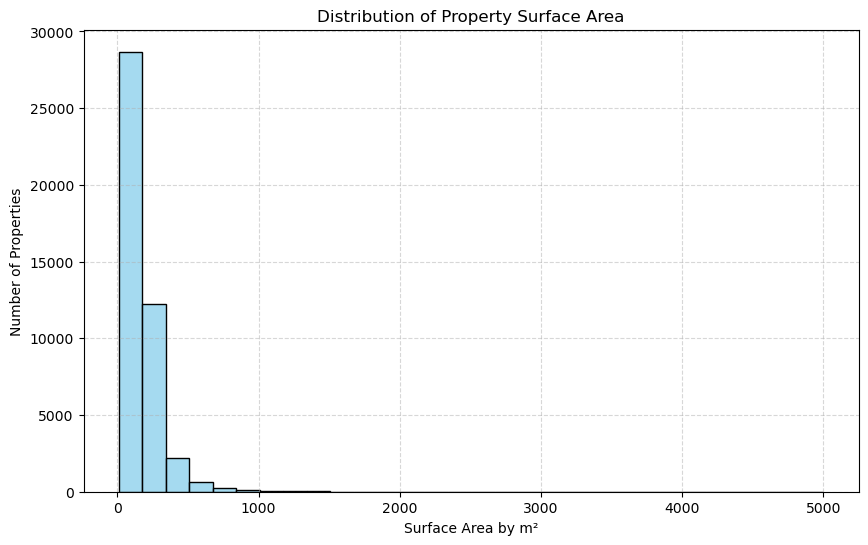

In [179]:

""" Visualisation of number properties according to surface"""
# Print statement explaining the chart
display(Markdown("**Distribution of All Properties by Surface Area**"))
print("This histogram shows the distribution of all properties based on their habitable surface in m².")
print("It helps identify whether there are common property sizes, and shows any skewness in the data (e.g. many small apartments vs few large houses).")
print("As you can see: This chart includes some extreme values which skew the visual impression and make the chart alomst unusable.")
# Plot
plt.figure(figsize=(10,6))
sns.histplot(df["habitablesurface"], bins=30, color='skyblue', edgecolor='black')

plt.title("Distribution of Property Surface Area")
plt.xlabel("Surface Area by m²")
plt.ylabel("Number of Properties")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Distribution of Surface Area, Without Outliers**

This version of the previous chart removes the top 1% of properties with the largest surface areas, in the 99th percentile.
The goal is to focus on the majority of properties without being distorted by a few very large ones.
This provides a clearer view of the typical distribution of property sizes.
As we can see from the graph, the majority of properties lie around the 100m² to 200m² point, with the peak being at 100m²


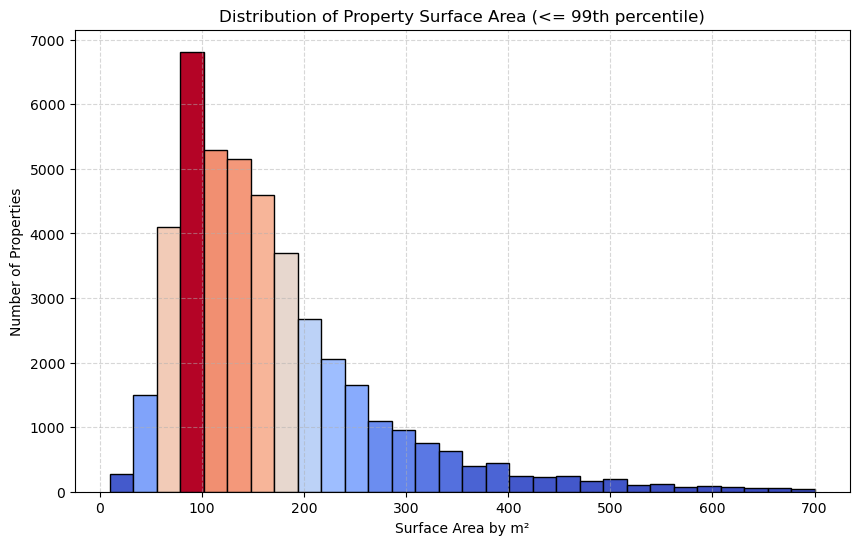

In [180]:

""" Visualisation of number properties according to surface, 99th percentile"""
# Print statement explaining the chart
display(Markdown("**Distribution of Surface Area, Without Outliers**"))
print("This version of the previous chart removes the top 1% of properties with the largest surface areas, in the 99th percentile.")
print("The goal is to focus on the majority of properties without being distorted by a few very large ones.")
print("This provides a clearer view of the typical distribution of property sizes.")
print("As we can see from the graph, the majority of properties lie around the 100m² to 200m² point, with the peak being at 100m²")

# Set filter for outliers to 99th percentile
plt.figure(figsize=(10,6))
p99 = df["habitablesurface"].quantile(0.99)
df_filtered = df[df["habitablesurface"] <= p99]

data = df_filtered["habitablesurface"]

# Histogram values
N, bins, patches = plt.hist(data, bins=30, edgecolor='black')

# Normalize the bin heights to create gradient
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

# Apply gradient color using viridis
cmap = cm.coolwarm
for thisfrac, thispatch in zip(fracs, patches):
    color = cmap(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title("Distribution of Property Surface Area (<= 99th percentile)")
plt.xlabel("Surface Area by m²")
plt.ylabel("Number of Properties")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [181]:

""" Visualisation of number properties according to surface, 99th percentile, divided by subtype"""
# Print statement explaining the chart
display(Markdown("**Property Surface Area by Subtype**"))
print("This interactive Plotly histogram shows the surface distribution from the previous chart, but now split by property subtype (e.g. house, apartment, villa).")
print("We're still filtering to the 99th percentile to remove extreme values.")
print("We overlayed the subtypes, allowing us to compare subtypes within the same space while still seeing overlap.")
print("We can now start filtering on subtype so we can see how the distribution among individual subtypes")

# Divide previous accoriding to subtype, using plotly
p99 = df["habitablesurface"].quantile(0.99)
df_filtered = df[df["habitablesurface"] <= p99]

# Plot
fig = px.histogram(df_filtered, x="habitablesurface", color="subtype",
                   nbins=30,
                   title="Distribution of Property Surface Area by Subtype (<= 99th percentile)",
                   labels={"habitablesurface": "Surface Area (m²)"},
                   barmode='overlay', opacity=0.6)

fig.update_layout(xaxis_title="Surface Area (m²)", yaxis_title="Count")
fig.show()


**Property Surface Area by Subtype**

This interactive Plotly histogram shows the surface distribution from the previous chart, but now split by property subtype (e.g. house, apartment, villa).
We're still filtering to the 99th percentile to remove extreme values.
We overlayed the subtypes, allowing us to compare subtypes within the same space while still seeing overlap.
We can now start filtering on subtype so we can see how the distribution among individual subtypes


**Price Corrolation Heatmap**

In this heatmap we can see the corrolation of all features to eachother,
but most important, their corrolation to the price.
 


**All feature correlations with price:**

- price_per_m2: 0.57
- habitablesurface: 0.51
- bedroomcount: 0.37
- hasswimmingpool: 0.29
- building_condition: 0.22
- hasterrace: 0.09
- hasgarden: 0.05
- haslift: 0.05


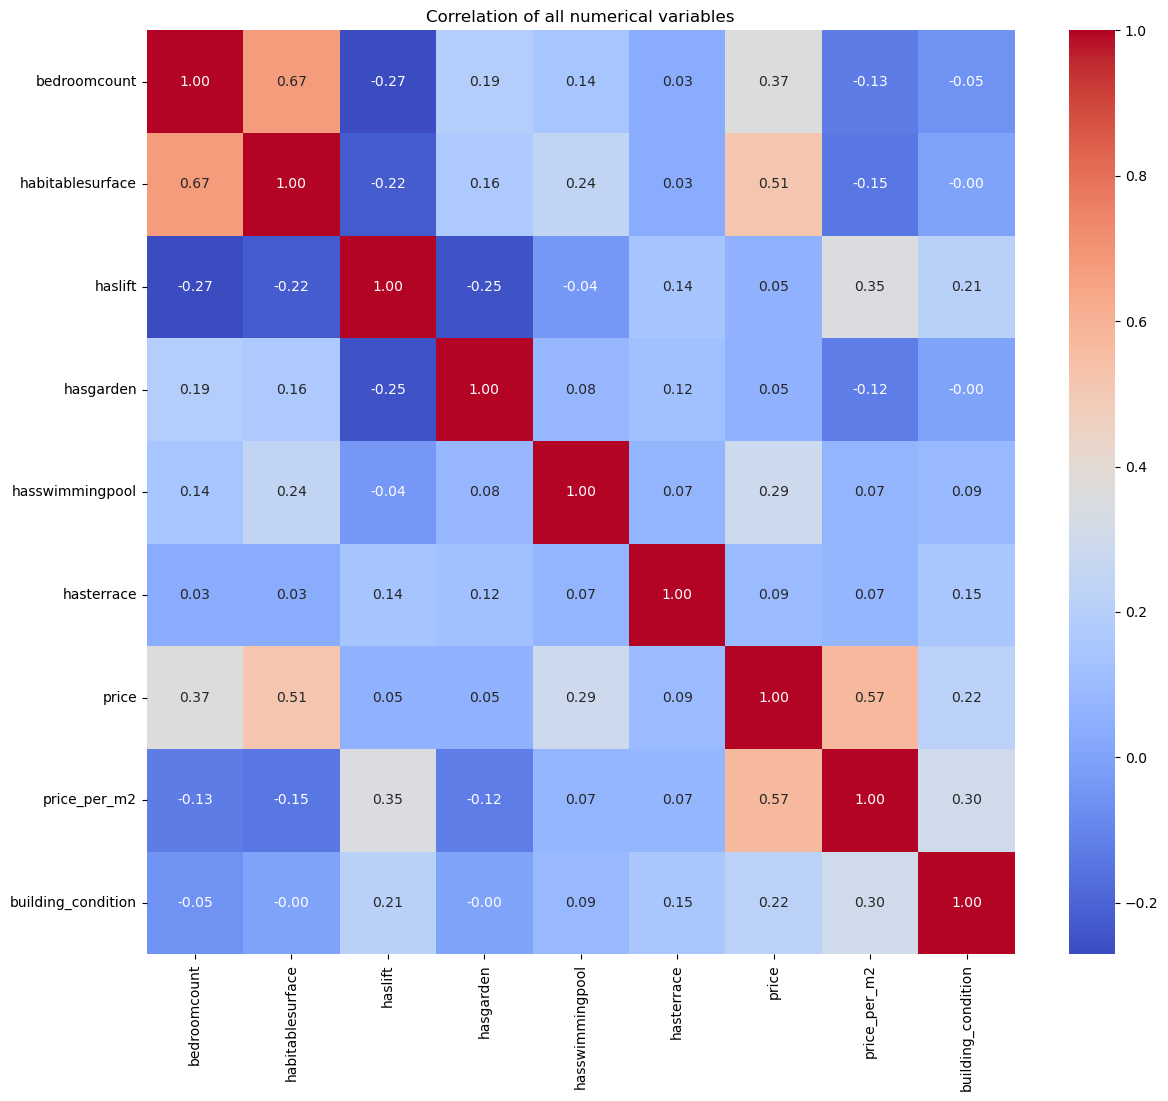

KeyError: 'subtype'

In [ ]:

"""Top 5 variables that influence price"""

# Map building condition categories to numerical values
condition_mapping = {
    'as new': 3,
    'just renovated': 2,
    'good': 1,
    'to be done up': 0,
    'to renovate': 0,
    'to restore': 0
}
df['building_condition'] = df['buildingcondition'].map(condition_mapping)

# Drop the original buildingcondition column
df = df.drop(columns=['buildingcondition'])

# Create a variable for all categories to drop from the heatmap
categories_to_drop = ['postcode', 'locality', 'province', 'subtype', 'type', 'region']

# Redefine the dataframe by dropping the non numerical categories
df = df.drop(columns=[column for column in categories_to_drop if column in df.columns])

# Create a variable for all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate and store correlation of all remaining features with price
correlations = df[numerical_cols].corr()['price'].abs().sort_values(ascending=False)
# Print statement explaining the chart
display(Markdown("**Price Corrolation Heatmap**"))
print("In this heatmap we can see the corrolation of all features to eachother,")
print("but most important, their corrolation to the price.")
print (" ")
# Print all values
display(Markdown("**All feature correlations with price:**"))
for variable, correlation_value in correlations.drop('price').items():
    print(f"- {variable}: {correlation_value:.2f}")

# Plot full heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of all numerical variables")
plt.show()



**Top 5 Heatmap**

In this heatmap we can see the top 5 most important features corrolating to price.



**Top 5 features most correlated with price:**

- price_per_m2: 0.57
- habitablesurface: 0.51
- bedroomcount: 0.37
- hasswimmingpool: 0.29
- building_condition: 0.22


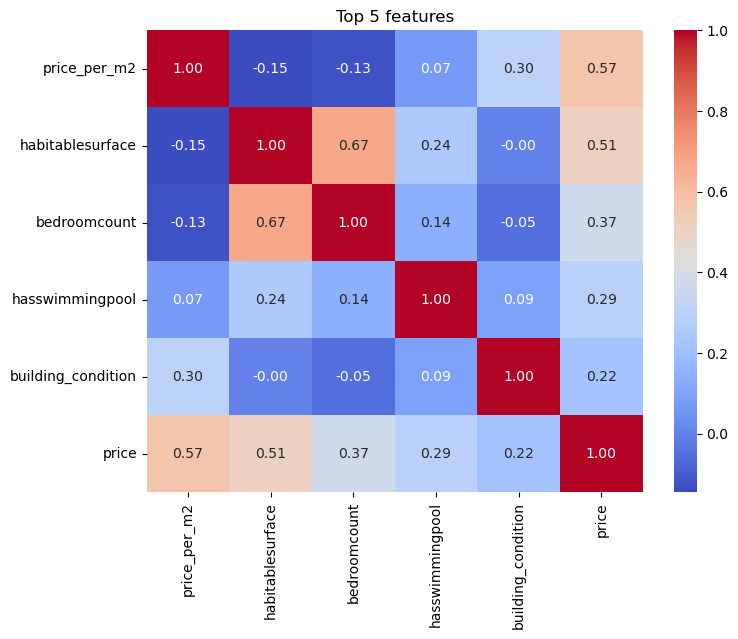

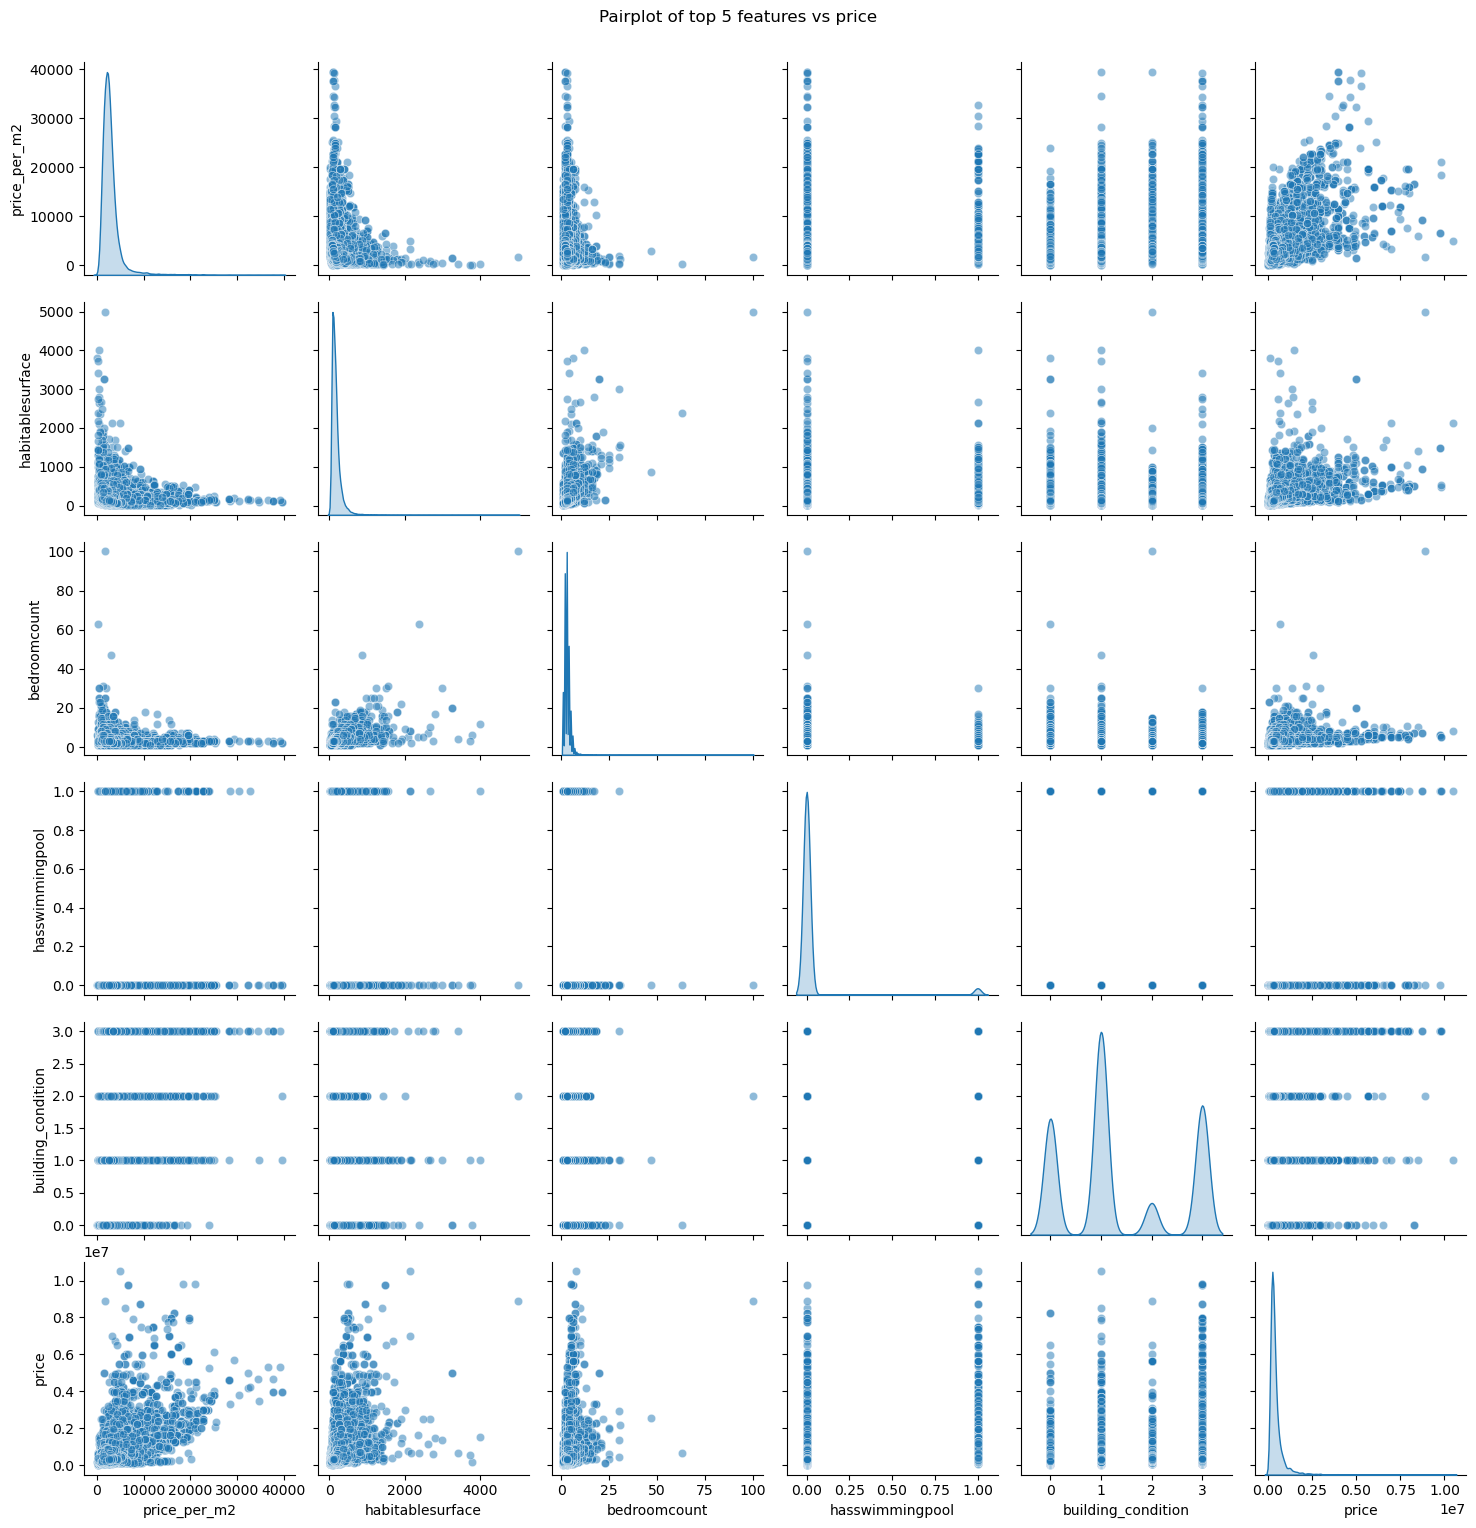

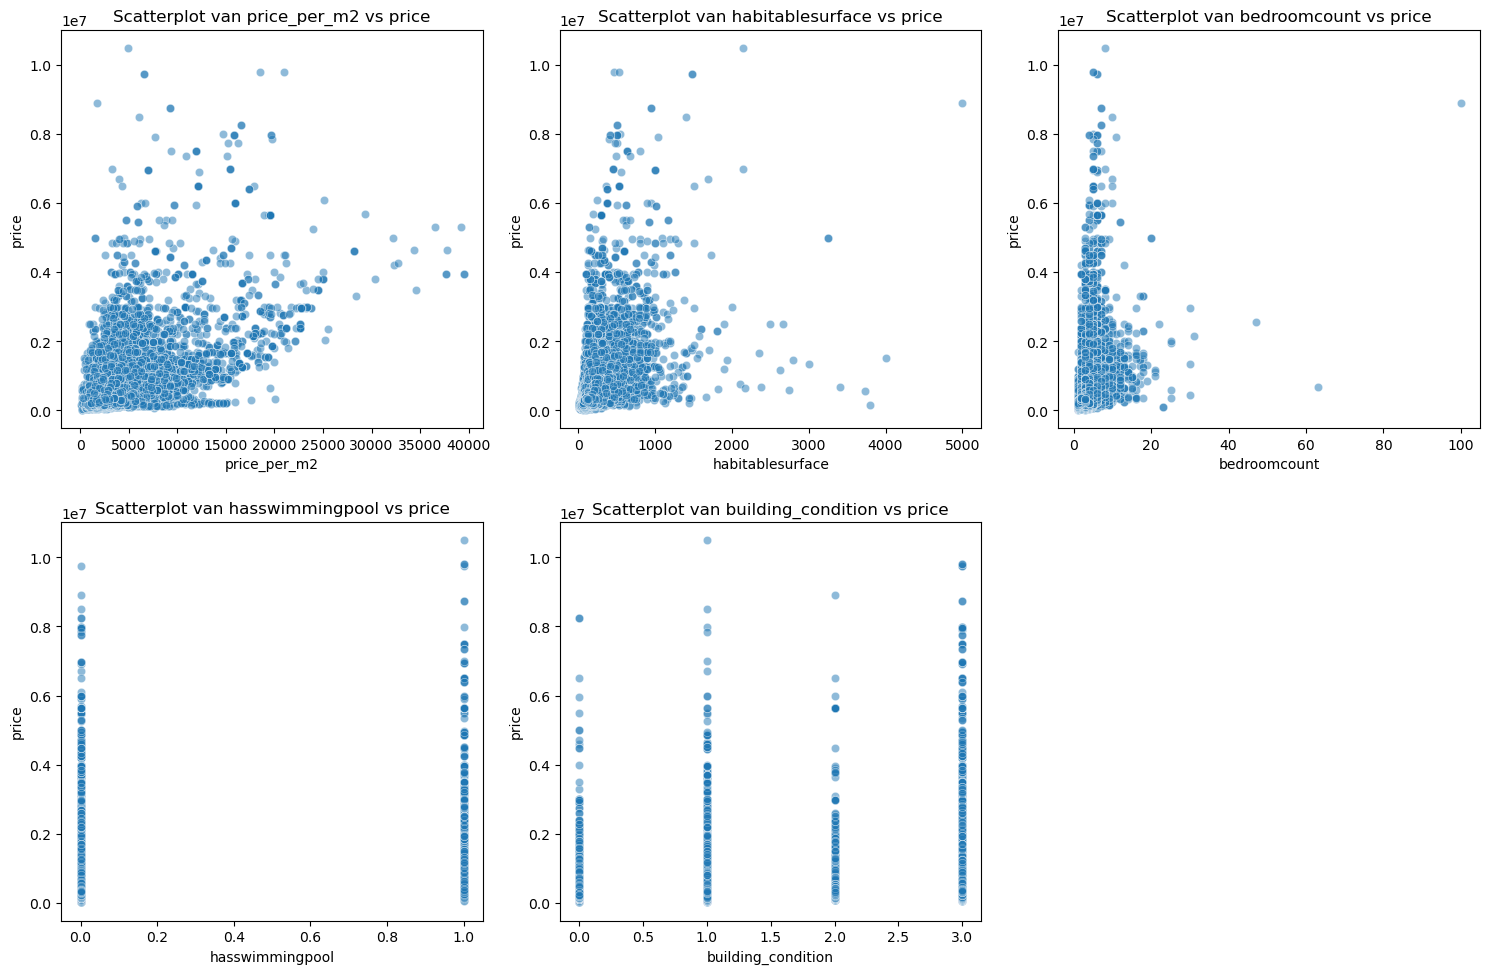

In [ ]:

# Print statement explaining the chart
display(Markdown("**Top 5 Heatmap**"))
print("In this heatmap we can see the top 5 most important features corrolating to price.")
print ("")
# Extract top 5 features most correlated with price
top5 = correlations.drop('price').head(5)

# Print top 5 variables
display(Markdown("**Top 5 features most correlated with price:**"))
for variable, correlation_value in top5.items():
    print(f"- {variable}: {correlation_value:.2f}")

# Create a list of the top 5 features
top5_vars = top5.index.tolist()
# Plot heatmap of top 5 variables + price
plt.figure(figsize=(8, 6))
sns.heatmap(df[top5_vars + ['price']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top 5 features")
plt.show()


top_vars_plus_price = top5_vars + ['price']
sns.pairplot(df[top_vars_plus_price], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of top 5 features vs price', y=1.02)
plt.show()

plt.figure(figsize=(15, 10))

for i, var in enumerate(top5_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df['price'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('price')
    plt.title(f'Scatterplot van {var} vs price')

plt.tight_layout()
plt.show()


# python -m jupyter nbconvert Kenny_jupiter.ipynb --to slides --post serve --TemplateExporter.exclude_input=True

# python -m jupyter nbconvert Kenny_jupiter.ipynb --to slides --post serve --reveal-prefix=https://cdnjs.cloudflare.com/ajax/libs/reveal.js/4.1.0 --TemplateExporter.exclude_input=True
